### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.12.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
len(trainX)

60000

In [7]:
len(testX)

10000

In [8]:
len(trainY)

60000

In [9]:
len(testY)

10000

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [12]:
trainX[0:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

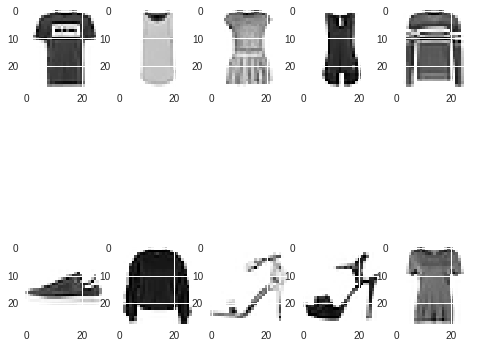

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, 11):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(trainX[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [15]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 23us/step - loss: 2.9107 - acc: 0.0841 - val_loss: 12.6031 - val_acc: 0.0786
Epoch 2/30
60000/60000 [==============================] - 1s 18us/step - loss: 2.6670 - acc: 0.1232 - val_loss: 10.7622 - val_acc: 0.1071
Epoch 3/30
60000/60000 [==============================] - 1s 16us/step - loss: 2.4646 - acc: 0.1698 - val_loss: 9.2281 - val_acc: 0.1346
Epoch 4/30
60000/60000 [==============================] - 1s 16us/step - loss: 2.2957 - acc: 0.2141 - val_loss: 7.8842 - val_acc: 0.1579
Epoch 5/30
60000/60000 [==============================] - 1s 16us/step - loss: 2.1533 - acc: 0.2534 - val_loss: 6.7424 - val_acc: 0.1814
Epoch 6/30
60000/60000 [==============================] - 1s 16us/step - loss: 2.0317 - acc: 0.2876 - val_loss: 5.8167 - val_acc: 0.2036
Epoch 7/30
60000/60000 [==============================] - 1s 17us/step - loss: 1.9267 - acc: 0.3179 - val_loss: 5.0789 - val_a

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [16]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.5784 - acc: 0.8012 - val_loss: 0.5091 - val_acc: 0.8250
Epoch 2/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.4861 - acc: 0.8326 - val_loss: 0.4842 - val_acc: 0.8312
Epoch 3/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.4687 - acc: 0.8389 - val_loss: 0.4842 - val_acc: 0.8367
Epoch 4/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.4558 - acc: 0.8442 - val_loss: 0.4783 - val_acc: 0.8349
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.4484 - acc: 0.8443 - val_loss: 0.4685 - val_acc: 0.8372
Epoch 6/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.4464 - acc: 0.8454 - val_loss: 0.4761 - val_acc: 0.8370
Epoch 7/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.4387 - acc: 0.8478 - val_loss: 0.4677 - val_acc

### Execute the model

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))


sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse')

In [18]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.0887 - val_loss: 0.0789
Epoch 2/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0724 - val_loss: 0.0641
Epoch 3/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0604 - val_loss: 0.0555
Epoch 4/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0541 - val_loss: 0.0511
Epoch 5/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0505 - val_loss: 0.0481
Epoch 6/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0480 - val_loss: 0.0460
Epoch 7/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.0459 - val_loss: 0.0444
Epoch 8/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.0443 - val_loss: 0.0427
Epoch 9/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0429 - val_loss: 0.0416
Epoch

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))##use sigmoid instead of relu for this residency

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [25]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 99us/step - loss: 1.0252 - acc: 0.6959 - val_loss: 0.6298 - val_acc: 0.7752
Epoch 2/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.5684 - acc: 0.7991 - val_loss: 0.5100 - val_acc: 0.8168
Epoch 3/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.4876 - acc: 0.8262 - val_loss: 0.4663 - val_acc: 0.8319
Epoch 4/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.4517 - acc: 0.8382 - val_loss: 0.4420 - val_acc: 0.8407
Epoch 5/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.4270 - acc: 0.8476 - val_loss: 0.4243 - val_acc: 0.8459
Epoch 6/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.4102 - acc: 0.8528 - val_loss: 0.4117 - val_acc: 0.8496
Epoch 7/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.3955 - acc: 0.8581 - val_loss: 0.4037 - val_acc

In [0]:
model.save('mnist_ext.h5')

In [27]:
model.predict(testX[0:2])

array([[1.48595727e-05, 7.52700362e-06, 4.06772524e-05, 1.62302895e-05,
        8.68702500e-06, 3.36545170e-03, 1.16925075e-04, 1.31253945e-02,
        3.32605268e-04, 9.82971728e-01],
       [1.51557452e-03, 2.56991680e-05, 8.97511184e-01, 4.76247878e-05,
        7.35672489e-02, 1.26522100e-05, 2.71345973e-02, 3.30623129e-06,
        1.61857490e-04, 2.03573436e-05]], dtype=float32)

In [30]:
testY[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)